<a href="https://colab.research.google.com/github/Arya-Raj/Smartknowers-/blob/master/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
                                                                                        #MINI PROJECT
#To read the CSV file
import pandas as pd
data=pd.read_csv("/content/drive/My Drive/Disease prediction.csv")

In [226]:
#To convert the data set into a dataframe
data_frame=pd.DataFrame(data)
data_frame.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
#To know the unique values in the first column
data_frame["Disease"].unique()
print(data_frame["Symptom_1"].unique())


['itching' ' skin_rash' ' continuous_sneezing' ' shivering'
 ' stomach_pain' ' acidity' ' vomiting' ' indigestion' ' muscle_wasting'
 ' patches_in_throat' ' fatigue' ' weight_loss' ' sunken_eyes' ' cough'
 ' headache' ' chest_pain' ' back_pain' ' weakness_in_limbs' ' chills'
 ' joint_pain' ' yellowish_skin' ' constipation'
 ' pain_during_bowel_movements' ' breathlessness' ' cramps' ' weight_gain'
 ' mood_swings' ' neck_pain' ' muscle_weakness' ' stiff_neck'
 ' pus_filled_pimples' ' burning_micturition' ' bladder_discomfort'
 ' high_fever']


[678, 786, 222, 108, 222, 222, 1740, 222, 108, 108, 1818, 264, 108, 240, 444, 144, 108, 108, 798, 684, 492, 114, 114, 138, 114, 114, 138, 228, 114, 114, 108, 138, 114, 486]
['itching', ' skin_rash', ' continuous_sneezing', ' shivering', ' stomach_pain', ' acidity', ' vomiting', ' indigestion', ' muscle_wasting', ' patches_in_throat', ' fatigue', ' weight_loss', ' sunken_eyes', ' cough', ' headache', ' chest_pain', ' back_pain', ' weakness_in_limbs', ' chills', ' joint_pain', ' yellowish_skin', ' constipation', ' pain_during_bowel_movements', ' breathlessness', ' cramps', ' weight_gain', ' mood_swings', ' neck_pain', ' muscle_weakness', ' stiff_neck', ' pus_filled_pimples', ' burning_micturition', ' bladder_discomfort', ' high_fever']
count of each symptom 
                            Name  count
0                        itching    678
1                      skin_rash    786
2            continuous_sneezing    222
3                      shivering    108
4                   stomach_pain 

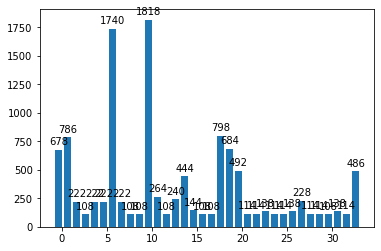

In [228]:
#To take total count of each symptom and then visualising it
import matplotlib.pyplot as plt
import numpy as np
t=[]
s=[]
q=[]
d1=[]
d2=[]
l=0
for i in data_frame["Symptom_1"].unique():
  d1.append(i)
  d2.append(l)
  p=data_frame.Symptom_1.str.count(i).sum()
  t.append(p)
  r=data_frame.Symptom_2.str.count(i).sum()
  s.append(r)
  u=data_frame.Symptom_3.str.count(i).sum()
  q.append(u)
  l+=1
f=[]
for i in range(0,len(t)):
 f.append(t[i]+s[i]+q[i])
print(f)
print(d1)
n=pd.DataFrame({'Name':d1,'count':f})
print("count of each symptom ")
print(n)
x= np.arange(len(d1))
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2,f, width)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)


In [229]:
#To convert the string values to float
#Ref:https://techwithtim.net/tutorials/machine-learning-python/k-nearest-neighbors-1/#:~:text=In%20order%20to%20train%20the,of%20our%20data%20into%20integers.
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data_framec=data_frame.copy()

In [230]:
data_framec['Symptom_1']=le.fit_transform(data_frame['Symptom_1'])
data_framec['Symptom_2']=le.fit_transform(data_frame['Symptom_2'])
data_framec['Symptom_3']=le.fit_transform(data_frame['Symptom_3'])

In [231]:
#inputs
x=data_framec.iloc[:,1:4]
y=data_framec.iloc[:,0]


In [232]:
#provide testing and training data
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,random_state=10)


In [233]:
from sklearn.neighbors import KNeighborsClassifier

In [234]:
classifier=KNeighborsClassifier(n_neighbors=1)

In [235]:
classifier.fit(x_tr,y_tr)
y_pre=classifier.predict(x_te)

In [236]:
y_pre

array(['Pneumonia', 'Chronic cholestasis', 'GERD', ...,
       'Alcoholic hepatitis', 'hepatitis A', 'Common Cold'], dtype=object)

In [237]:
y_te


3881              Pneumonia
856     Chronic cholestasis
4307                   GERD
435                    GERD
1132         Hypothyroidism
               ...         
3873            hepatitis A
563                 Malaria
2894    Alcoholic hepatitis
2766            hepatitis A
3798            Common Cold
Name: Disease, Length: 1230, dtype: object

In [238]:
#Accuracy Score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_te,y_pre)*100

93.90243902439023

In [239]:
#Confusion matrix
confusion_matrix(y_te,y_pre)

array([[28,  0,  0, ...,  0,  0,  0],
       [ 0, 29,  0, ...,  0,  0,  0],
       [ 0,  0, 30, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 29,  0,  0],
       [ 0,  0,  0, ...,  0, 30,  0],
       [ 0,  0,  0, ...,  0,  0, 34]])

In [240]:
#precision,recall,f1-score,support
print(classification_report(y_te,y_pre))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        28
                                   AIDS       1.00      1.00      1.00        29
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        23
                                Allergy       1.00      1.00      1.00        27
                              Arthritis       1.00      1.00      1.00        29
                       Bronchial Asthma       0.94      1.00      0.97        30
                   Cervical spondylosis       1.00      1.00      1.00        34
                            Chicken pox       1.00      1.00      1.00        29
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      0.88      0.94        25
                           